In [ ]:
import numpy as np
import pandas as pd

import string
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

**BACA DATASET**

In [ ]:
import pandas as pd
df = pd.read_csv('reviews.csv')

In [ ]:
# Menampilkan 5 baris pertama data
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
df = df[['Review', 'Rating', 'Total_thumbsup']]
df.head()

,Review,Rating,Total_thumbsup
0,"Great music service, the audio is high quality...",5,2
1,Please ignore previous negative rating. This a...,5,1
2,"This pop-up ""Get the best Spotify experience o...",4,0
3,Really buggy and terrible to use as of recently,1,1
4,Dear Spotify why do I get songs that I didn't ...,1,1


**CLEANING DATAFRAME**

In [ ]:
df.isna().sum()

Review            0
Rating            0
Total_thumbsup    0
dtype: int64

In [ ]:
# Memeriksa data duplikat
duplikat = df[df.duplicated()]

print(duplikat)

                                      Review  Rating  Total_thumbsup
2495                      Good app for songs       5               0
2996                         I love Spotify.       5               0
3261                       Amazing music app       5               0
3308                            Too many ads       1               1
4457                 Great app tons of music       5               0
...                                      ...     ...             ...
40690              Great selection of music.       5               0
49117              Great selection of music.       5               0
49915              Great selection of music.       5               0
58543  Great selection of music and podcasts       5               0
59155  Easy to use. Great selection of songs       5               0

[180 rows x 3 columns]


In [ ]:
df = df.drop_duplicates()

In [ ]:
# Tangani nilai NaN pada kolom 'Review' dengan menggantinya menjadi string kosong
df['Review'].fillna('', inplace=True)

**CLEANING DATASET**

In [ ]:
df

,Review,Rating,Total_thumbsup
0,"Great music service, the audio is high quality...",5,2
1,Please ignore previous negative rating. This a...,5,1
2,"This pop-up ""Get the best Spotify experience o...",4,0
3,Really buggy and terrible to use as of recently,1,1
4,Dear Spotify why do I get songs that I didn't ...,1,1
...,...,...,...
61589,Even though it was communicated that lyrics fe...,1,6
61590,"Use to be sooo good back when I had it, and wh...",1,0
61591,This app would be good if not for it taking ov...,2,10
61592,The app is good hard to navigate and won't jus...,2,1


In [ ]:
def clean_text(text):
    if not isinstance(text, str):  # Pastikan nilai berupa string
        return ""
    # Hilangkan karakter non-alfabet
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Ubah menjadi huruf kecil
    text = text.lower()
    # Tokenisasi
    tokens = word_tokenize(text)
    # Hilangkan stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Gabungkan kembali menjadi teks bersih
    return ' '.join(tokens)

In [ ]:
# Bersihkan kolom title dan description
df['Review'] = df['Review'].apply(clean_text)

In [ ]:
df

,Review,Rating,Total_thumbsup
0,great music service audio high quality app eas...,5,2
1,please ignore previous negative rating app sup...,5,1
2,popup get best spotify experience android anno...,4,0
3,really buggy terrible use recently,1,1
4,dear spotify get song didnt put playlist shuff...,1,1
...,...,...,...
61589,even though communicated lyric feature availab...,1,6
61590,use sooo good back downloaded free version cou...,1,0
61591,app would good taking device start comp there ...,2,10
61592,app good hard navigate wont let play song clic...,2,1


In [ ]:
ps = PorterStemmer()

# Fungsi untuk melakukan stemming
def stemming_text(text):
    # Tokenisasi teks
    words = word_tokenize(text)
    # Stemming setiap kata
    stemmed_words = [ps.stem(word) for word in words]
    # Gabungkan kata-kata yang sudah di-stem menjadi satu teks
    return ' '.join(stemmed_words)

# Terapkan stemming pada kolom title dan description
df['Review'] = df['Review'].apply(clean_text)

In [ ]:
df

,Review,Rating,Total_thumbsup
0,great music service audio high quality app eas...,5,2
1,please ignore previous negative rating app sup...,5,1
2,popup get best spotify experience android anno...,4,0
3,really buggy terrible use recently,1,1
4,dear spotify get song didnt put playlist shuff...,1,1
...,...,...,...
61589,even though communicated lyric feature availab...,1,6
61590,use sooo good back downloaded free version cou...,1,0
61591,app would good taking device start comp spotif...,2,10
61592,app good hard navigate wont let play song clic...,2,1


**FEATURE ENGINEERING**

In [ ]:
def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Baik"
    if rating == 3:
        return "Netral"
    if rating == 2 or rating == 1:
        return "Buruk"

In [ ]:
df['Rating'] = df['Rating'].apply(transform_ratings)

In [ ]:
df

,Review,Rating,Total_thumbsup
0,great music service audio high quality app eas...,Baik,2
1,please ignore previous negative rating app sup...,Baik,1
2,popup get best spotify experience android anno...,Baik,0
3,really buggy terrible use recently,Buruk,1
4,dear spotify get song didnt put playlist shuff...,Buruk,1
...,...,...,...
61589,even though communicated lyric feature availab...,Buruk,6
61590,use sooo good back downloaded free version cou...,Buruk,0
61591,app would good taking device start comp spotif...,Buruk,10
61592,app good hard navigate wont let play song clic...,Buruk,1


In [ ]:
# df.to_csv('ulasan_spotify.csv', index=False)

In [ ]:
X = df['Review']
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46060,), (15354,), (46060,), (15354,))

In [ ]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**MODELING**

Random Forest

In [ ]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random Forest Classifier on TF-IDF Vectors: {rf_tfidf}')

Random Forest Classifier on TF-IDF Vectors: 0.753810082063306


Support Vector Machines (SVM)

In [ ]:
# from sklearn.svm import SVC

# svm2 = SVC(kernel='linear', random_state=42)
# svm2.fit(X_train_tfidf, y_train)
# svm_tfidf = svm2.score(X_test_tfidf, y_test)
# print(f'SVM Classifier on TF-IDF Vectors: {svm_tfidf}')

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb2 = MultinomialNB()
nb2.fit(X_train_tfidf, y_train)
nb_tfidf = nb2.score(X_test_tfidf, y_test)
print(f'Naive Bayes Classifier on TF-IDF Vectors: {nb_tfidf}')

Naive Bayes Classifier on TF-IDF Vectors: 0.7536798228474665


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(max_iter=1000, random_state=42)
lr2.fit(X_train_tfidf, y_train)
lr_tfidf = lr2.score(X_test_tfidf, y_test)
print(f'Logistic Regression Classifier on TF-IDF Vectors: {lr_tfidf}')

Logistic Regression Classifier on TF-IDF Vectors: 0.7834440536667969


**EVALUATION**

Random Forest Classifier on TF-IDF Vectors: 0.7543962485345839
Training Time (RF): 631.8440 seconds
Prediction Time (RF): 3.4109 seconds


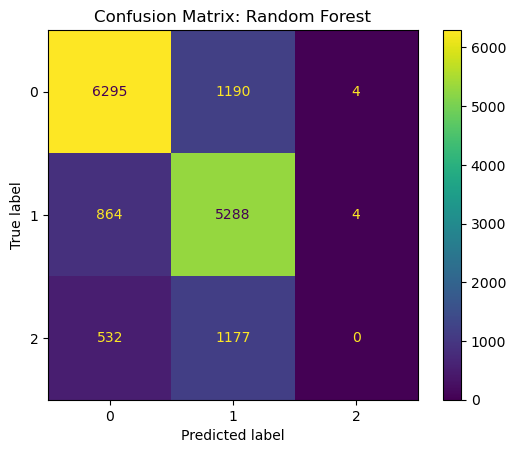

Naive Bayes Classifier on TF-IDF Vectors: 0.7536798228474665
Training Time (NB): 0.1214 seconds
Prediction Time (NB): 0.0224 seconds


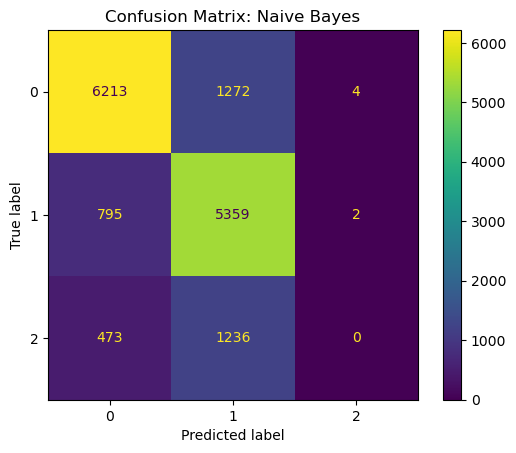

Logistic Regression Classifier on TF-IDF Vectors: 0.7834440536667969
Training Time (LR): 35.3498 seconds
Prediction Time (LR): 0.0235 seconds


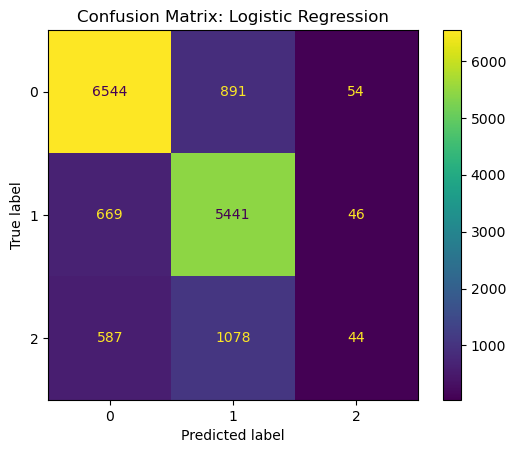

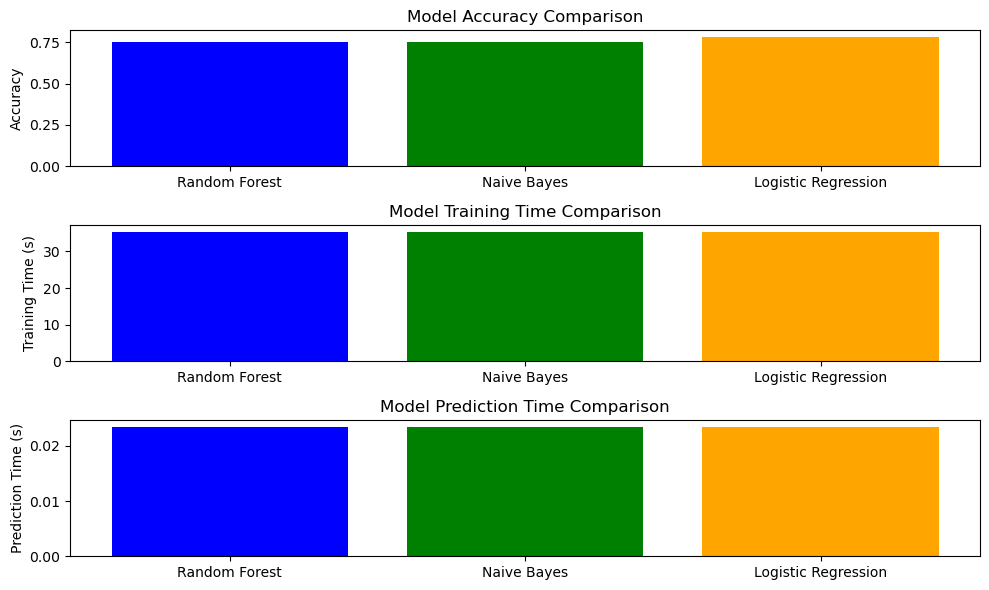

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Model 1: Random Forest Classifier
start_train = time.time()
rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
end_train = time.time()

start_pred = time.time()
y_pred_rf = rf2.predict(X_test_tfidf)
end_pred = time.time()

rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random Forest Classifier on TF-IDF Vectors: {rf_tfidf}')
print(f'Training Time (RF): {end_train - start_train:.4f} seconds')
print(f'Prediction Time (RF): {end_pred - start_pred:.4f} seconds')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=rf2.classes_)
disp_rf.plot()
plt.title("Confusion Matrix: Random Forest")
plt.show()

# Model 2: Naive Bayes Classifier
start_train = time.time()
nb2 = MultinomialNB()
nb2.fit(X_train_tfidf, y_train)
end_train = time.time()

start_pred = time.time()
y_pred_nb = nb2.predict(X_test_tfidf)
end_pred = time.time()

nb_tfidf = nb2.score(X_test_tfidf, y_test)
print(f'Naive Bayes Classifier on TF-IDF Vectors: {nb_tfidf}')
print(f'Training Time (NB): {end_train - start_train:.4f} seconds')
print(f'Prediction Time (NB): {end_pred - start_pred:.4f} seconds')

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(cm_nb, display_labels=nb2.classes_)
disp_nb.plot()
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

# Model 3: Logistic Regression
start_train = time.time()
lr2 = LogisticRegression(max_iter=1000, random_state=42)
lr2.fit(X_train_tfidf, y_train)
end_train = time.time()

start_pred = time.time()
y_pred_lr = lr2.predict(X_test_tfidf)
end_pred = time.time()

lr_tfidf = lr2.score(X_test_tfidf, y_test)
print(f'Logistic Regression Classifier on TF-IDF Vectors: {lr_tfidf}')
print(f'Training Time (LR): {end_train - start_train:.4f} seconds')
print(f'Prediction Time (LR): {end_pred - start_pred:.4f} seconds')

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(cm_lr, display_labels=lr2.classes_)
disp_lr.plot()
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Visualisasi Perbandingan
scores = [rf_tfidf, nb_tfidf, lr_tfidf]
train_times = [end_train - start_train for _ in range(3)]
pred_times = [end_pred - start_pred for _ in range(3)]
models = ['Random Forest', 'Naive Bayes', 'Logistic Regression']

plt.figure(figsize=(10, 6))

# Plot Accuracy
plt.subplot(3, 1, 1)
plt.bar(models, scores, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Plot Training Time
plt.subplot(3, 1, 2)
plt.bar(models, train_times, color=['blue', 'green', 'orange'])
plt.ylabel('Training Time (s)')
plt.title('Model Training Time Comparison')

# Plot Prediction Time
plt.subplot(3, 1, 3)
plt.bar(models, pred_times, color=['blue', 'green', 'orange'])
plt.ylabel('Prediction Time (s)')
plt.title('Model Prediction Time Comparison')

plt.tight_layout()
plt.show()

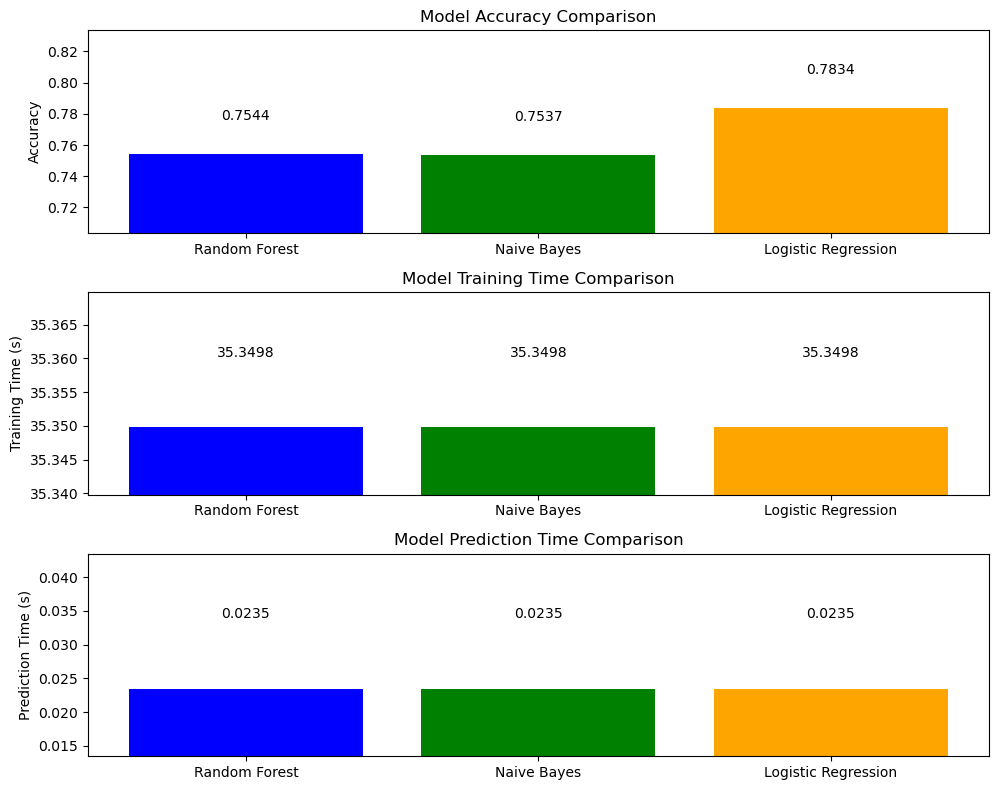

In [ ]:
# Visualisasi Perbandingan dengan Penyesuaian pada Plot Akurasi, Waktu Pelatihan, dan Waktu Prediksi
scores = [rf_tfidf, nb_tfidf, lr_tfidf]
train_times = [end_train - start_train for _ in range(3)]
pred_times = [end_pred - start_pred for _ in range(3)]
models = ['Random Forest', 'Naive Bayes', 'Logistic Regression']

plt.figure(figsize=(10, 8))

# Plot Accuracy with adjusted y-axis for better visibility
plt.subplot(3, 1, 1)
plt.bar(models, scores, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([min(scores) - 0.05, max(scores) + 0.05])  # Adjust y-axis range to add some padding

# Plot Training Time with expanded y-axis range for better visibility
plt.subplot(3, 1, 2)
plt.bar(models, train_times, color=['blue', 'green', 'orange'])
plt.ylabel('Training Time (s)')
plt.title('Model Training Time Comparison')
plt.ylim([min(train_times) - 0.01, max(train_times) + 0.02])  # Adjust y-axis for better range

# Plot Prediction Time with expanded y-axis range for better visibility
plt.subplot(3, 1, 3)
plt.bar(models, pred_times, color=['blue', 'green', 'orange'])
plt.ylabel('Prediction Time (s)')
plt.title('Model Prediction Time Comparison')
plt.ylim([min(pred_times) - 0.01, max(pred_times) + 0.02])  # Adjust y-axis for better range

# Add text on top of bars for clarity
for i, v in enumerate(scores):
    plt.subplot(3, 1, 1)
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

for i, v in enumerate(train_times):
    plt.subplot(3, 1, 2)
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

for i, v in enumerate(pred_times):
    plt.subplot(3, 1, 3)
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()